# Лайт, вариант 2

In [ ]:
# импортируем библиотеки
from tensorflow.keras.datasets import mnist # import MNIST!
from tensorflow.keras.models import Sequential # модель Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # слои
from tensorflow.keras.optimizers import Adam # optimizer
from tensorflow.keras import utils # for to_categorial
from tensorflow.keras.preprocessing import image # image

import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


# MNIST

### Подготовка

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_org[16] # вывод массивом значений каждого пикселя

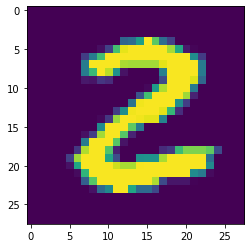

In [ ]:
n = 25 #картинка
plt.imshow(x_train_org[n], cmap='viridis') #Отрисовка картинки
plt.show() # Вывод

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
# Получаем: (60000, 28, 28) и (60000, 784)
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)
print(x_test.shape)
print ('----------------------------------------')
#print (x_train[1])

(60000, 28, 28)
(60000, 784)
(10000, 784)
----------------------------------------
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0 

In [ ]:
# преобразовываем входные данные
x_train = x_train.astype('float32') # меняем тип на  float
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') 
x_test = x_test / 255 

In [ ]:
# перечень самих чмсел
y_train_org

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# добавляем число в одну из "50" категорий
utils.to_categorical(y_train_org[24], 50)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)
print(y_train[24])

(60000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(y_train_org.shape)
print(y_train_org[36], '\n')
print(y_train_org, '-', len(y_train_org))

(60000,)
6 

[5 0 4 ... 5 6 8] - 60000


## Create NS

In [ ]:
model = Sequential() # сеть прямого распространения
model.add(Dense(600, input_dim=784, activation="relu")) # полносвязный слой на 600 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # слой на 10 нейронов с softmax-активацией

model2 = Sequential() 
model2.add(Dense(400, input_dim=784, activation="relu")) 
model2.add(Dense(400, activation="tanh"))
model2.add(Dense(10, activation="softmax"))

model3 = Sequential() 
model3.add(Dense(400, input_dim=784, activation="relu")) 
model3.add(Dense(400, activation="sigmoid"))
model3.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
model2.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])
model3.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])
print(model.summary(), model2.summary(), model3.summary()) #Вывод структуры модели

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_5 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                4010      
Total params: 715,410
Trainable params: 715,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_8 (Dense)              (None, 400)               160400    
__________________________

## Learn NS

In [ ]:
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
val_split = [1/6, 5/6, 555/600]
a,b,c, w = [0,0,0], [0,0,0], [0,0,0], 0
for i in val_split: # validation_split=...
  print ('******************************** Step '+ str(w+1) + ' ********************************')
  a[w] = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split = i)
  b[w] = model2.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split = i)
  c[w] = model3.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split = i)
  w += 1

******************************** Step 1 ********************************
Epoch 1/15
391/391 [==============================] - 6s 16ms/step - loss: 0.2372 - accuracy: 0.9293 - val_loss: 0.1020 - val_accuracy: 0.9699
Epoch 2/15
391/391 [==============================] - 6s 15ms/step - loss: 0.0848 - accuracy: 0.9740 - val_loss: 0.0878 - val_accuracy: 0.9736
Epoch 3/15
391/391 [==============================] - 6s 15ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0802 - val_accuracy: 0.9754
Epoch 4/15
391/391 [==============================] - 6s 15ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.1052 - val_accuracy: 0.9697
Epoch 5/15
391/391 [==============================] - 6s 15ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0774 - val_accuracy: 0.9789
Epoch 6/15
391/391 [==============================] - 6s 15ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.0787 - val_accuracy: 0.9797
Epoch 7/15
391/391 [==============================] - 6s 15ms/step - 

In [ ]:
'''n_rec = 1234
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()'''

"n_rec = 1234\nplt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec\nplt.show()"

In [ ]:
'''#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)'''

'#Выбираем нужную картинку из тестовой выборки\nx = x_test[n_rec]\nprint(x.shape)'

In [ ]:
'''#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример - это "+1" будет происходить при каждом запуске блока
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)'''

'#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример - это "+1" будет происходить при каждом запуске блока\n#Потому что нейронка принимает именно массив примеров для распознавания\n#Мы делаем массив из одного примера\nx = np.expand_dims(x, axis=0)\nprint(x.shape)'

## Table

In [ ]:
# Вместо таблицы
'''
Step 1 (50000)
accuracy: 0.9831 - val_accuracy: 0.9698
accuracy: 0.9705 - val_accuracy: 0.9627
accuracy: 0.6855 - val_accuracy: 0.7088

Step 2 (10000)
accuracy: 1.0000 - val_accuracy: 0.9882
accuracy: 0.9954 - val_accuracy: 0.9708
accuracy: 0.7555 - val_accuracy: 0.7280

Step 3 (500)
accuracy: 1.0000 - val_accuracy: 0.9894
accuracy: 0.9996 - val_accuracy: 0.9735
accuracy: 0.7797 - val_accuracy: 0.7423

Вывод:
На всех трех сетях при обучаещей выборке 50 000 модель показала себя максимально обученной, но скорее всего переобучена

На всех трех сетях при обучаещей выборке 10 000 модель показала лучше результаты, подозреваю что есть признаки переобучения

На всех трех сетях при обучаещей выборке 500 модель показала максимальный результат на тестовой выборке, либо она переобучена, либо меньшая обучающая выборка действиельно помогает повысить показатели на тесте
'''

In [ ]:
# выводы по результатам проведенных тестов.
'''
import pandas as pd
# import numpy as np

df = pd.DataFrame({
   'Эксперимент №': ['01', '02', '03', '04', '05', '06', '07', '08'],
   # (!) точность брал максимальную, т.к. средняя почти одинаковая, а "на глаз" ставить не вижу смысла
   'Полученная точность': ['0.9801', '0.9804', '0.9806', '0.9774', '0.9672', '0.9813', '0.9809', '0.9172'],
   'Что сделано': ['В одном из слоёв высталено 5000 нейронов', 'В одном из слоёв высталено 500 нейронов','В одном из слоёв высталено 10 нейронов',
                   'Заменена активация в скрытом слое','Выставлен batch 1','Выставлен batch 10',
                   'Выставлен batch 100', 'Выставлен batch 60000'],
   'Выводы': ['Эпохи стали значительно дольше обучаться', 'Эпохи обучаются заметно быстрее предыдущего случая, качество незначительно выросло', 
              'Качество такое же как и ранее или незначительно лучше', 
              'Качество ухудшилось, relu показал себя лучше', 
              'Дольше всех выполнялось обучение модели - пришлось уменьшить кол-во нейронов, результат ниже среднего', 
              'Обучение пошло быстрее чем в прошлом случае, наверное лучший вариант среди экспериментов', 
              'Обучение быстрее прошлого случая, результат выше среднего',
              'Показатель точности сильно упал по сравнению с остальными']
})

df

'''

In [ ]:
# Задача 3

In [ ]:
def createModel():

  model = Sequential()

  model.add(BatchNormalization(input_shape=(60, )))
  model.add(Dense(400, activation='relu'))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(Dense(300, activation='relu'))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(Dense(300, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model # Возвращаем сеть и обучение

createModel()
model

Epoch 1/40
240/240 [==============================] - 5s 22ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0871 - val_accuracy: 0.9843
Epoch 2/40
240/240 [==============================] - 5s 22ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0854 - val_accuracy: 0.9840
Epoch 3/40
240/240 [==============================] - 5s 21ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0908 - val_accuracy: 0.9842
Epoch 4/40
240/240 [==============================] - 5s 22ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1036 - val_accuracy: 0.9832
Epoch 5/40
240/240 [==============================] - 5s 21ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0935 - val_accuracy: 0.9847
Epoch 6/40
240/240 [==============================] - 5s 22ms/step - loss: 0.0062 - accuracy: 0.9977 - val_loss: 0.0998 - val_accuracy: 0.9836
Epoch 7/40
240/240 [==============================] - 5s 21ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1003 - val_accuracy: 0.9824

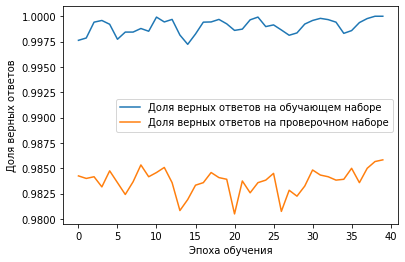

In [ ]:
#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# PRO, вариант 1
Повысьте точность модели по обнаружению мин до 90 % на тестовой выборке. Можно использовать различные варианты слоев Dropout и BatchNormalization. Можно менять количество примеров в обучающей и проверочной выборках, но нельзя менять количество примеров в тестовой. 



In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


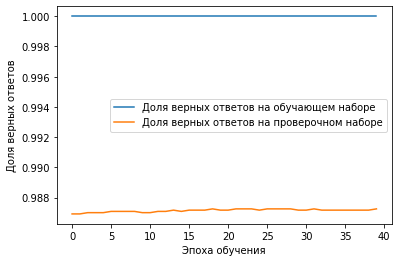

In [ ]:
#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=150, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=0)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
pred_example = model.predict(x_test)
print(np.argmax(pred_example[0])) # model.predict(x_test)[0]
print(np.argmax(y_test[0]))

7
7


In [ ]:
m1, m2 = 0, 0
for i in range(10000):
  if np.argmax(pred_example[i]) == np.argmax(y_test[i]):
    m1+=1 
  else: 
    m2+=1

print (m1/10000, m2/10000)

0.9865 0.0135


In [ ]:
for i in range(100):
  print (np.argmax(pred_example[i]), '-', np.argmax(y_test[i]), end = ', ')

7 - 7, 2 - 2, 1 - 1, 0 - 0, 4 - 4, 1 - 1, 4 - 4, 9 - 9, 5 - 5, 9 - 9, 0 - 0, 6 - 6, 9 - 9, 0 - 0, 1 - 1, 5 - 5, 9 - 9, 7 - 7, 3 - 3, 4 - 4, 9 - 9, 6 - 6, 6 - 6, 5 - 5, 4 - 4, 0 - 0, 7 - 7, 4 - 4, 0 - 0, 1 - 1, 3 - 3, 1 - 1, 3 - 3, 4 - 4, 7 - 7, 2 - 2, 7 - 7, 1 - 1, 2 - 2, 1 - 1, 1 - 1, 7 - 7, 4 - 4, 2 - 2, 3 - 3, 5 - 5, 1 - 1, 2 - 2, 4 - 4, 4 - 4, 6 - 6, 3 - 3, 5 - 5, 5 - 5, 6 - 6, 0 - 0, 4 - 4, 1 - 1, 9 - 9, 5 - 5, 7 - 7, 8 - 8, 9 - 9, 3 - 3, 7 - 7, 4 - 4, 6 - 6, 4 - 4, 3 - 3, 0 - 0, 7 - 7, 0 - 0, 2 - 2, 9 - 9, 1 - 1, 7 - 7, 3 - 3, 2 - 2, 9 - 9, 7 - 7, 7 - 7, 6 - 6, 2 - 2, 7 - 7, 8 - 8, 4 - 4, 7 - 7, 3 - 3, 6 - 6, 1 - 1, 3 - 3, 6 - 6, 9 - 9, 3 - 3, 1 - 1, 4 - 4, 1 - 1, 7 - 7, 6 - 6, 9 - 9, 

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

# Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [ ]:
a = mnist.load_data()
for i in a:
  print(len(i[0]), len(i[1]))

60000 60000
10000 10000
